# 4.4 - Redes convolucionales

## Transfer-learning y fine-tunning

A menudo, en lugar de diseñar y entrenar una CNN desde cero para abordar un problema específico, se utiliza una red pre-entrenada en un conjunto de datos amplio y variado.

Esta técnica se conoce como **transfer-learning**. La idea principal es reutilizar los pesos y arquitectura de una red ya entrenada que ha aprendido características útiles y generales de las imágenes, y adaptarla a una nueva tarea específica. 

Para adaptar una red existente a nuestro problema, lo que haremos será eliminar las capas finales y utilizar solamente la *parte convolucional* o la parte de *extracción de características* (feature extraction en la siguiente figura):

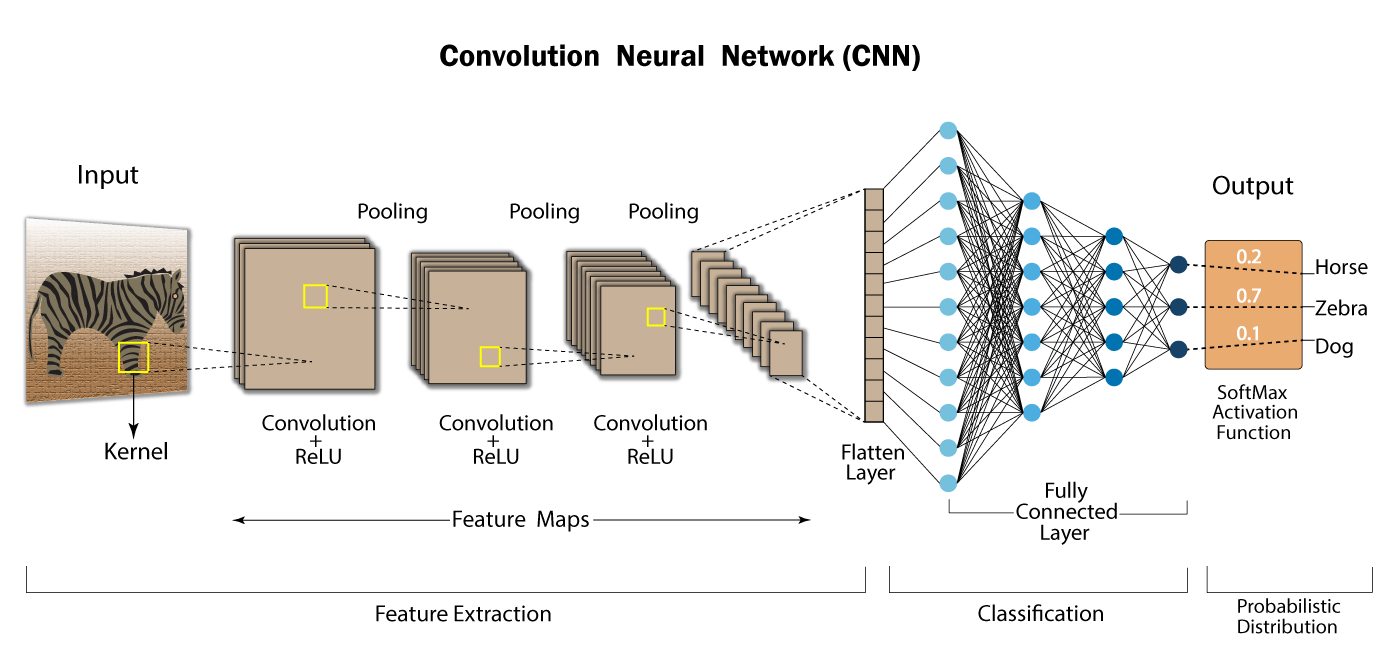

A esta parte convolucional tendremos que añadir las capas necesarias para adaptar la salida del modelo al problema a resolver. Los pesos de la parte de extracción de características se congelan para que no se modifiquen y solo se entrena la parte final recién añadida.

Otra alternativa es realizar lo que se denomina **transfer-learning + fine-tunning**. En este caso haremos exactamente lo mismo que en la parte de transfer-learning, pero los pesos de la parte convolucional del modelo pre-entrenado **no se congelan**, también se ajustan durante el entrenamiento con el conjunto de datos del nuevo problema. 

Hay que tener en cuenta que no nos interesa mover en gran medida estos pesos, solo ajustarlos, por tanto, en este escenario de *transfer-learning + fine-tunning* el learning-rate suele fijarse en un valor más bajo de lo habitual.

A continuación verás un ejemplo de un modelo creado mediante transfer-learning. Para buscar modelos pre-entrenados para clasificación de imágenes puedes entrar [aquí](https://pytorch.org/vision/stable/models.html#classification).

### Descargar y explorar el modelo

Cargamos un modelo ResNet18 pre-entrenado para resolver el problema ImageNet y exploramos su arquitectura.

In [ ]:
from torchvision import models

pretrained_model = models.resnet18(pretrained=True)
print(pretrained_model)

Como se puede ver, está compuesta de varias capas individuales y sub-modelos con nombre layer1, layer2, ...

Vamos a explorar los nombres de los módulos.

In [ ]:
for name, children in pretrained_model.named_children():
    print(name)

La última capa (donde se resuelve el problema de clasificación ImageNet) se denomina ``fc``, vamos a ver que contiene.

In [ ]:
print(pretrained_model.fc)

Nuestro objetivo será, por tanto, reemplazar esta capa por una que sirva para nuestro problema, lo que resultaría en el siguiente modelo.

In [ ]:
class TransferLearningCNN(nn.Module):
    def __init__(self):
        super(TransferLearningCNN, self).__init__()
        
        # Cargar el modelo deseado
        self.model = models.resnet18(pretrained=True)
    
        # Congelar todos los pesos del modelo pre-entrenado
        for param in self.model.parameters():
            param.requires_grad = False
        
        # Cambiamos la última capa del modelo (capa Fully connected (fc)) por una que se adapta a nuestro problema
        self.model.fc = nn.Linear(512, 2)

    def forward(self, x):
        x = self.model(x)
        return x

> **EJERCICIO:** Crea un modelo para resolver el problema de CIFAR10 utilizando como base [Mobilenet_v3_small](https://pytorch.org/vision/stable/models/generated/torchvision.models.mobilenet_v3_small.html#torchvision.models.mobilenet_v3_small).

> Compara una versión en la que solo realices transfer-learning con otra donde apliques transfer-learning y fine-tunning. 

> Utiliza solamente los 5 primeros bloques de capas del extractor de características.

> Evalúa su rendimiento mostrando las imágenes y predicciones para el primer batch de test.

